### This is a fictional 2025 forecast of Morgan Stanley's mortgage origination data built from 2021-2024 HMDA data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_2024 = pd.read_csv('MorganStanley2024.csv', sep='|')

df_2023 = pd.read_csv('MorganStanley2023.csv', sep='|')

df_2022 = pd.read_csv('MorganStanley2022.csv', sep='|')

df_2021 = pd.read_csv('MorganStanley2021.csv', sep='|')

/var/folders/q0/rp311cxj6qg302m63zf3qm5m0000gn/T/ipykernel_32932/4139230453.py:5: DtypeWarning: Columns (73) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2022 = pd.read_csv('MorganStanley2022.csv', sep='|')
/var/folders/q0/rp311cxj6qg302m63zf3qm5m0000gn/T/ipykernel_32932/4139230453.py:7: DtypeWarning: Columns (73) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2021 = pd.read_csv('MorganStanley2021.csv', sep='|')


In [4]:
# Concat dfs and reset index

df = pd.concat([df_2024, df_2023, df_2022, df_2021])

df = df.reset_index(drop=True)

In [5]:
df.tail()

,activity_year,lei,loan_type,loan_purpose,preapproval,construction_method,occupancy_type,loan_amount,action_taken,state_code,...,submission_of_application,initially_payable_to_institution,aus_1,aus_2,aus_3,aus_4,aus_5,reverse_mortgage,open_end_line_of_credit,business_or_commercial_purpose
61863,2021,549300GS0W0TEUQS8571,1,4,2,1,1,355000,4,MI,...,1,1,6,NaN,NaN,NaN,NaN,2,2,2
61864,2021,549300GS0W0TEUQS8571,1,1,2,1,1,1885000,4,FL,...,1,1,6,NaN,NaN,NaN,NaN,2,2,2
61865,2021,549300GS0W0TEUQS8571,1,2,2,1,2,345000,4,CA,...,1,1,6,NaN,NaN,NaN,NaN,2,2,2
61866,2021,549300GS0W0TEUQS8571,1,1,2,1,1,2085000,4,NY,...,1,1,6,NaN,NaN,NaN,NaN,2,2,2
61867,2021,549300GS0W0TEUQS8571,1,31,2,1,1,205000,4,TX,...,1,1,6,NaN,NaN,NaN,NaN,2,2,2


In [6]:
# allocate business dates equally amoungst years

years = [2021, 2022, 2023, 2024]
n_per_year = len(df) // len(years)

dates = []
for year in years:
    days = pd.bdate_range(f'{year}-01-01', f'{year}-12-31')
    choices = np.random.choice(days, n_per_year, replace=True)
    dates.extend(choices)

df = df.iloc[:len(dates)]  # in case len(df) not a multiple of years
df['activity_date'] = dates

In [7]:
print(len(df))
df.head()

61868


,activity_year,lei,loan_type,loan_purpose,preapproval,construction_method,occupancy_type,loan_amount,action_taken,state_code,...,initially_payable_to_institution,aus_1,aus_2,aus_3,aus_4,aus_5,reverse_mortgage,open_end_line_of_credit,business_or_commercial_purpose,activity_date
0,2024,549300GS0W0TEUQS8571,1,4,2,1,3,25255000,1,CA,...,1,6,NaN,NaN,NaN,NaN,2,2,1,2021-03-17
1,2024,549300GS0W0TEUQS8571,1,1,2,1,3,9455000,1,WA,...,1,6,NaN,NaN,NaN,NaN,2,2,1,2021-08-26
2,2024,549300GS0W0TEUQS8571,1,31,2,1,3,8905000,1,NJ,...,1,6,NaN,NaN,NaN,NaN,2,2,1,2021-02-08
3,2024,549300GS0W0TEUQS8571,1,4,2,1,3,75005000,1,AK,...,1,6,NaN,NaN,NaN,NaN,2,1,1,2021-12-27
4,2024,549300GS0W0TEUQS8571,1,1,2,1,3,5005000,1,NY,...,1,6,NaN,NaN,NaN,NaN,2,2,1,2021-05-12


In [8]:
# drop columns that aren't loan amount or date

df = df[['loan_amount', 'activity_date']]
df.head()

,loan_amount,activity_date
0,25255000,2021-03-17
1,9455000,2021-08-26
2,8905000,2021-02-08
3,75005000,2021-12-27
4,5005000,2021-05-12


In [9]:
#convert date column to datetime, set as index, drop 'activity date' column

df['Date'] = pd.to_datetime(df['activity_date'])
df = df.set_index('Date')
df = df.drop('activity_date', axis=1)
df.head()

,loan_amount
Date,
2021-03-17,25255000
2021-08-26,9455000
2021-02-08,8905000
2021-12-27,75005000
2021-05-12,5005000


In [10]:
# import ten_yr data

# read in df
ten_yr = pd.read_csv('DGS10.csv', parse_dates=['observation_date'], index_col='observation_date')

ten_yr.index.name = "Date"

# rename columns
ten_yr.rename(columns={"DGS10": "10yr"}, inplace=True)

ten_yr.head()

,10yr
Date,
2020-08-10,0.59
2020-08-11,0.64
2020-08-12,0.69
2020-08-13,0.71
2020-08-14,0.71


In [11]:
# merge ten_yr with HMDA data

housing_df = pd.merge(df, ten_yr, on="Date", how="inner")

housing_df.head()

,loan_amount,10yr
Date,,
2021-03-17,25255000,1.63
2021-08-26,9455000,1.34
2021-02-08,8905000,1.19
2021-12-27,75005000,1.48
2021-05-12,5005000,1.69


In [12]:
nan_counts_per_column = housing_df.isna().sum()
print(nan_counts_per_column)

loan_amount       0
10yr           2578
dtype: int64


In [13]:
#drop 10yr that are NaN
housing_df.dropna(subset=['10yr'], inplace=True)


In [14]:
print("Total rows:", len(housing_df))
print("Non-null 10yr count:", housing_df['10yr'].count())
print("Number of NaNs in 10yr:", housing_df['10yr'].isna().sum())

Total rows: 59290
Non-null 10yr count: 59290
Number of NaNs in 10yr: 0


In [15]:
housing_df = housing_df.sort_values('Date')
housing_df.head()

,loan_amount,10yr
Date,,
2021-01-04,1205000,0.93
2021-01-04,1795000,0.93
2021-01-04,865000,0.93
2021-01-04,855000,0.93
2021-01-04,875000,0.93


In [16]:
# resample df to monthly

df_monthly = housing_df.resample('M').agg({
    'loan_amount': 'sum',
    '10yr': 'mean'
})
df_monthly

/var/folders/q0/rp311cxj6qg302m63zf3qm5m0000gn/T/ipykernel_32932/3874615121.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = housing_df.resample('M').agg({


,loan_amount,10yr
Date,,
2021-01-31,1236695000,1.083680
2021-02-28,1205645000,1.259035
2021-03-31,1485840000,1.611684
2021-04-30,1531455000,1.632635
2021-05-31,1296210000,1.620522
2021-06-30,1289550000,1.518645
2021-07-31,1402630000,1.318412
2021-08-31,1402750000,1.282679
2021-09-30,1255345000,1.375240


In [17]:
# import SARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX

## Model Specifics

### p (autoregressive order):

The number of lagged past values of the time series used to predict the current value.

For example, p=1 means the model uses the previous month's value to help predict the current month.

### d (degree of differencing):

How many times the data is differenced to make it stationary (removing trends or seasonality).

d=1 means the model uses the differences between consecutive data points (e.g., month-to-month changes) rather than raw values.

### q (moving average order):

The number of lagged forecast errors included in the model.

For example, q=1 means the model corrects current predictions based on the previous error.

In [19]:
# Ensure exogenous variables have no missing values aligned with target
exog = df_monthly[['10yr']]

# Fit SARIMAX model with ARIMA order (p,d,q) - 
model = SARIMAX(df_monthly['loan_amount'], exog=exog, order=(12, 1, 1))

results = model.fit()

# Prepare expected treasury yields for next 12 months
expected_treasury_yield_array = [4.0, 4.1, 4.5, 4.6, 4.7, 4.9, 4.7, 4.6, 4.2, 4.1, 4.1, 4.0]

# Forecast next 12 months loan amounts
forecast = results.get_forecast(steps=12, exog=expected_treasury_yield_array)

# Get the predicted mean values and their date index
mean_forecast = forecast.predicted_mean

# Print the month and forecasted value for each month
for date, value in mean_forecast.items():
    print(date.strftime('%m-%Y'), round(value, 0))


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.02821D+01    |proj g|=  1.01737D+00

At iterate    5    f=  1.98326D+01    |proj g|=  1.46097D-02

At iterate   10    f=  1.98276D+01    |proj g|=  8.09528D-02

At iterate   15    f=  1.98259D+01    |proj g|=  9.26646D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     18     22      1     0     0   6.526D-05   1.983D+01
  F =   19.825918457069399     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
01-2025 

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.


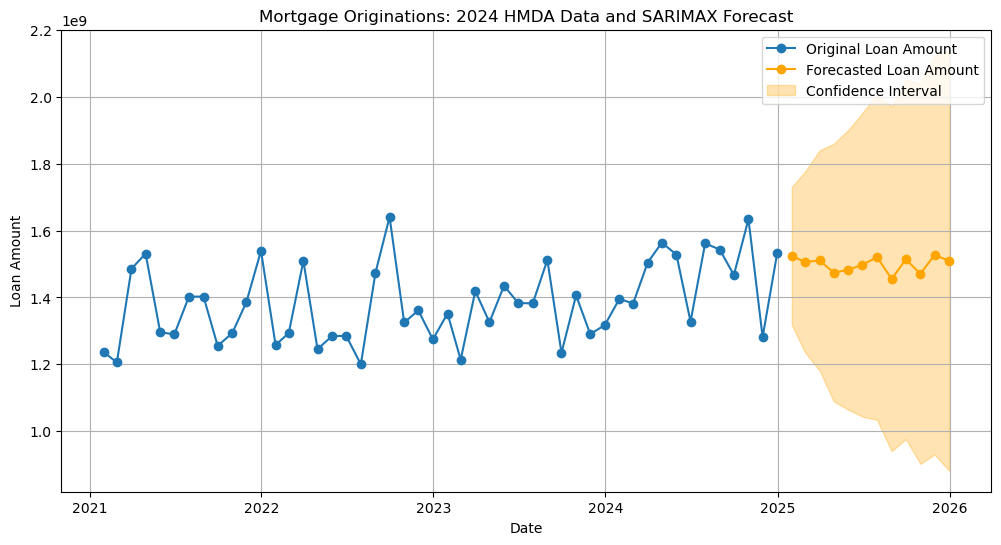

In [20]:
# Get predicted mean and confidence intervals as a DataFrame
forecast_df = forecast.summary_frame()

# Plot original loan_amount time series
plt.figure(figsize=(12, 6))
plt.plot(df_monthly.index, df_monthly['loan_amount'], label='Original Loan Amount', marker='o')

# Plot forecasted loan amounts
plt.plot(forecast_df.index, forecast_df['mean'], label='Forecasted Loan Amount', marker='o', color='orange')

# Plot confidence intervals as shaded area
plt.fill_between(forecast_df.index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'],
                 color='orange', alpha=0.3, label='Confidence Interval')

# Labels and title
plt.xlabel('Date')
plt.ylabel('Loan Amount')
plt.title('Mortgage Originations: 2024 HMDA Data and SARIMAX Forecast')
plt.legend()
plt.grid(True)
plt.show()


In [21]:
in_billions = (forecast_df['mean'] / 1e9).round(2)
print(in_billions)

2025-01-31    1.52
2025-02-28    1.51
2025-03-31    1.51
2025-04-30    1.47
2025-05-31    1.48
2025-06-30    1.50
2025-07-31    1.52
2025-08-31    1.46
2025-09-30    1.51
2025-10-31    1.47
2025-11-30    1.53
2025-12-31    1.51
Freq: ME, Name: mean, dtype: float64


In [22]:
forecast_df

loan_amount,mean,mean_se,mean_ci_lower,mean_ci_upper
2025-01-31,1.524415e+09,1.052274e+08,1.318173e+09,1.730657e+09
2025-02-28,1.506130e+09,1.379313e+08,1.235789e+09,1.776470e+09
2025-03-31,1.510823e+09,1.681034e+08,1.181346e+09,1.840300e+09
2025-04-30,1.474628e+09,1.966518e+08,1.089197e+09,1.860058e+09
2025-05-31,1.482596e+09,2.135032e+08,1.064137e+09,1.901054e+09
2025-06-30,1.498049e+09,2.319406e+08,1.043454e+09,1.952644e+09
2025-07-31,1.520615e+09,2.484731e+08,1.033617e+09,2.007614e+09
2025-08-31,1.455316e+09,2.629128e+08,9.400167e+08,1.970616e+09
2025-09-30,1.514204e+09,2.744613e+08,9.762696e+08,2.052138e+09
2025-10-31,1.470793e+09,2.900762e+08,9.022538e+08,2.039332e+09


In [23]:
# incorporate more exogonous features into the forecast

unemp_df = pd.read_csv('UNRATE.csv', parse_dates=['observation_date'], index_col='observation_date')

fedfunds_df = pd.read_csv('DFF.csv', parse_dates=['observation_date'], index_col='observation_date')

cpi_df = pd.read_csv('CORESTICKM159SFRBATL.csv', parse_dates=['observation_date'], index_col='observation_date')

display(unemp_df.head(5), fedfunds_df.head(5), cpi_df.head(5))

,UNRATE
observation_date,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5


,DFF
observation_date,
2020-08-08,0.1
2020-08-09,0.1
2020-08-10,0.1
2020-08-11,0.1
2020-08-12,0.1


,CORESTICKM159SFRBATL
observation_date,
1968-01-01,3.651861
1968-02-01,3.673819
1968-03-01,4.142164
1968-04-01,4.155828
1968-05-01,4.088245


In [24]:
# change the observations dates to datetime and set as index

dfs = [unemp_df, fedfunds_df, cpi_df]

for df in dfs:
    df.index.name = 'Date'


In [25]:
# merge dfs

exog_df = dfs[0]

# merge
for df in dfs[1:]:
    exog_df = pd.merge(exog_df, df, on="Date", how="inner")

exog_df.head()

,UNRATE,DFF,CORESTICKM159SFRBATL
Date,,,
2020-09-01,7.8,0.09,1.991587
2020-10-01,6.9,0.09,1.749610
2020-11-01,6.7,0.09,1.707378
2020-12-01,6.7,0.09,1.603908
2021-01-01,6.4,0.09,1.391588


In [26]:
#rename columns

exog_df = exog_df.rename(columns={'UNRATE': 'Unemployment Rate', 'DFF': 'Fed Funds Rate', 'CORESTICKM159SFRBATL': 'CPI'})
exog_df.head()

,Unemployment Rate,Fed Funds Rate,CPI
Date,,,
2020-09-01,7.8,0.09,1.991587
2020-10-01,6.9,0.09,1.749610
2020-11-01,6.7,0.09,1.707378
2020-12-01,6.7,0.09,1.603908
2021-01-01,6.4,0.09,1.391588


In [27]:
# convert data to monthly

# exog_df.index = pd.to_datetime(exog_df.index)

exog_monthly = exog_df.resample('M').agg({
    'Unemployment Rate': 'mean',
    'Fed Funds Rate': 'mean',
    'CPI': 'mean'
})

/var/folders/q0/rp311cxj6qg302m63zf3qm5m0000gn/T/ipykernel_32932/4006760618.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  exog_monthly = exog_df.resample('M').agg({


In [28]:
# merge dfs

df_monthly = pd.merge(df_monthly, exog_monthly, on='Date', how='inner')
df_monthly.head()
df_monthly.tail()

,loan_amount,10yr,Unemployment Rate,Fed Funds Rate,CPI
Date,,,,,
2024-08-31,1543455000,3.872361,4.2,5.33,4.112096
2024-09-30,1467285000,3.722664,4.1,5.33,4.012724
2024-10-31,1634235000,4.095603,4.1,4.83,3.963395
2024-11-30,1281420000,4.357039,4.2,4.83,3.876177
2024-12-31,1532785000,4.396615,4.1,4.58,3.746553


In [29]:
# forecast with more exogonous features

# Ensure exogenous variables have no missing values aligned with target
exog = df_monthly[['10yr', 'Unemployment Rate', 'Fed Funds Rate', 'CPI']]

# Fit SARIMAX model with ARIMA order (p,d,q) - 
model = SARIMAX(df_monthly['loan_amount'], exog=exog, order=(12, 1, 1))

results = model.fit()

# Prepare expected treasury yields for next 12 months
expected_treasury_yield_array = pd.DataFrame({'10yr':[4.0, 4.1, 4.5, 4.6, 4.7, 4.9, 4.7, 4.6, 4.5, 4.4, 4.3, 4.2],
                                             'Unemployment Rate': [4.0, 4.1, 4.2, 4.2, 4.2, 4.1, 4.2, 4.3, 4.2, 4.3, 4.2, 4.2],
                                             'Fed Funds Rate': [5.25, 5.25, 5.25, 5.25, 5.25, 5.25, 5.25, 5.0, 5.0, 4.5, 4.25, 4.25],
                                             'CPI': [3.0, 2.8, 2.4, 2.3, 2.4, 2.7, 2.7, 2.8, 2.9, 2.9, 2.9, 2.9]
                                            })


# Forecast next 12 months loan amounts
forecast = results.get_forecast(steps=12, exog=expected_treasury_yield_array)

# Get the predicted mean values and their date index
mean_forecast = forecast.predicted_mean

# Print the month and forecasted value for each month
for date, value in mean_forecast.items():
    print(date.strftime('%m-%Y'), round(value, 0))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.05581D+01    |proj g|=  1.28027D+00

At iterate    5    f=  1.97362D+01    |proj g|=  1.01808D-02

At iterate   10    f=  1.97359D+01    |proj g|=  1.78601D-02
01-2025 1453172311.0
02-2025 1437040661.0
03-2025 1423292616.0
04-2025 1377265715.0
05-2025 1394381469.0
06-2025 1419000614.0
07-2025 1432905203.0
08-2025 1403185217.0
09-2025 1446318601.0
10-2025 1450847996.0
11-2025 1529101565.0
12-2025 1517247737.0

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip 

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


In [30]:
mean_forecast

2025-01-31    1.453172e+09
2025-02-28    1.437041e+09
2025-03-31    1.423293e+09
2025-04-30    1.377266e+09
2025-05-31    1.394381e+09
2025-06-30    1.419001e+09
2025-07-31    1.432905e+09
2025-08-31    1.403185e+09
2025-09-30    1.446319e+09
2025-10-31    1.450848e+09
2025-11-30    1.529102e+09
2025-12-31    1.517248e+09
Freq: ME, Name: predicted_mean, dtype: float64

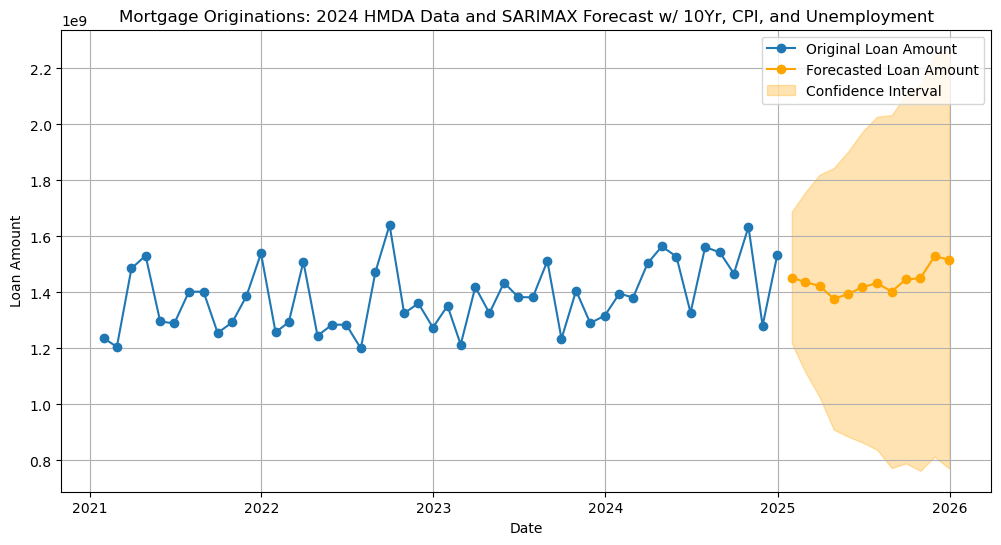

In [31]:
# plot results

# Get predicted mean and confidence intervals as a DataFrame
forecast_df = forecast.summary_frame()

plt.figure(figsize=(12,6))

plt.plot(df_monthly.index, df_monthly['loan_amount'], label='Original Loan Amount', marker='o')

plt.plot(forecast_df.index, forecast_df['mean'], label='Forecasted Loan Amount', color='orange', marker='o')

# Plot confidence intervals as shaded area
plt.fill_between(forecast_df.index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'],
                 color='orange', alpha=0.3, label='Confidence Interval')

# Labels and title
plt.xlabel('Date')
plt.ylabel('Loan Amount')
plt.title('Mortgage Originations: 2024 HMDA Data and SARIMAX Forecast w/ 10Yr, CPI, and Unemployment')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
mean_forecast = mean_forecast.to_frame(name='value')
mean_forecast['value_billion'] = (mean_forecast['value'] / 1e9).round(2)
mean_forecast

,value,value_billion
2025-01-31,1.453172e+09,1.45
2025-02-28,1.437041e+09,1.44
2025-03-31,1.423293e+09,1.42
2025-04-30,1.377266e+09,1.38
2025-05-31,1.394381e+09,1.39
2025-06-30,1.419001e+09,1.42
2025-07-31,1.432905e+09,1.43
2025-08-31,1.403185e+09,1.40
2025-09-30,1.446319e+09,1.45
2025-10-31,1.450848e+09,1.45
